# Lab 4: Scikit Learn, Classification and Clustering

### [Read an follow the prelab before answering the questions here](https://colab.research.google.com/drive/1digjhC-XpN07t7o7OATCUs9SESzzkmWI?usp=sharing)

## Academic Integrity Guidelines 
This lab is an individual assignment (like all the other labs). You should NOT work with your project teammate nor any other classmate. If you have questions, please ask us on Piazza.
You must reference (including URLs) of any resources other than those linked to in the assignment, or provided by the professor or TA. 


##To submit this assignment:
1.	Print your Jupyter Notebook as a PDF and upload it to Gradescope. **Make sure that each line of code has 80 characters maximum and that all your plots and text are properly displayed in the pdf.**
2.	Export your Jupyter Notebook as a python file (.py) and upload it to Gradescope. **If your pdf does not show your text and plots properly, submit your jupyter notebook file also (.ipynb)**


### SVM on Wine quality dataset

#### Exercise 4.1 (30 pts)

Now it's your turn to work with SVM. The wine data set is loaded below. You can learn more about the dataset by using `datasett.DESCR`. Here, you need to work with the first two features to train your model.

* Select the first two features for your X
* Split the dataset in two sets of training and testing data. Use 80% of the data for training and 20% for testing
* Perform linear SVM on the dataset 
* Perform non-linear SVM on the dataset 
* Display the classification report and accuracy for both models

### Linear SVM

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
#your code here
np.random.seed(100)
# load the wine data
data = load_wine(as_frame = True).frame
# select first two features for X
X = data.iloc[:,:2]
y = data.target
# print(X)
# split train-test data
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

## Linear SVM : Model 1
# clf1 is a linear svm classifier
clf1 = svm.SVC(kernel = 'linear')
# Fit data
clf1.fit(X_train, y_train)
# Predict
y1_predict = clf1.predict(X_test)
#Display the outcome of classification
print('Classification report for Linear SVM Model : \n\n' + str(metrics.classification_report(y_test, y1_predict)))
# print('Confusion matrix : ' + str(metrics.confusion_matrix(y_test, y_predict)))

Classification report for Linear SVM Model : 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.82      0.93      0.87        15
           2       0.80      0.62      0.70        13

    accuracy                           0.81        36
   macro avg       0.80      0.81      0.80        36
weighted avg       0.80      0.81      0.80        36



### Non Linear SVM

In [2]:
#Your code here
## Non-linear SVM : Model 2
# clf2 is a non-linear svm classifier
clf2 = svm.NuSVC()
# Fit data
clf2.fit(X_train, y_train)
# Predict
y2_predict = clf2.predict(X_test)
#Display the outcome of classification
print('Classification report for Non-linear SVM model : \n\n' + str(metrics.classification_report(y_test, y2_predict)))

Classification report for Non-linear SVM model : 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.88      0.93      0.90        15
           2       0.82      0.69      0.75        13

    accuracy                           0.83        36
   macro avg       0.82      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36



### Which method has a better accuracy?



## The non linear SVM has a better accuracy.

#### Exercise 4.2 (10 pts)

Scaling features is another step that can affect the performance of your classifier. 


* Select the first two features for your X
* Scale the features using `StandardScaler`
* Split the dataset in two sets of training and testing data. Use 80% of the data for training and 20% for testing
* Perform linear SVM on the dataset 
* Display the classification report and accuracy for both models


Did scaling data affect the classifier performance?

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


#Your code here
scaler.fit(X)
scaler.mean_
Xs = scaler.transform(X)
# split train-test data
Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs, y , test_size = 0.2)

## Linear SVM :
# clf1 is a linear svm classifier
clfs = svm.SVC(kernel = 'linear')
# Fit data
clfs.fit(Xs_train, ys_train)
# Predict
ys_predict = clfs.predict(Xs_test)
#Display the outcome of classification
print('Classification report for Linear SVM Model : \n\n' + str(metrics.classification_report(ys_test, ys_predict)))


Classification report for Linear SVM Model : 

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.88      0.94      0.91        16
           2       0.70      0.78      0.74         9

    accuracy                           0.83        36
   macro avg       0.82      0.81      0.82        36
weighted avg       0.84      0.83      0.83        36



### Did scaling data affect the classifier performance?

## Scaling the data did help increasing the accuracy of the Linear SVM from 81% to 83%

#### Exercise 4.3 (10 pts)

scikit-learn has many other classifiers. Pick another classifier of your choice ( KNN, DecisionTree, NaiveBayes, ...) and apply it to the wine dataset. Display the classification report and accuracy.

In [4]:
# split train-test data using the scaled data
Xdt_train , Xdt_test, ydt_train, ydt_test = train_test_split(Xs, y , test_size = 0.2)

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
# Fit data
clf_dt.fit(Xdt_train, ydt_train)
# Predict
ydt_predict = clf_dt.predict(Xdt_test)

#Display the outcome of classification
print('Classification report for Decision tree Model : \n\n' + str(metrics.classification_report(ydt_test, ydt_predict)))

Classification report for Decision tree Model : 

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.79      0.65      0.71        17
           2       0.11      0.20      0.14         5

    accuracy                           0.64        36
   macro avg       0.58      0.54      0.56        36
weighted avg       0.72      0.64      0.67        36



### Which classifier did you choose and did the classification improve?

## Classifier chosen : Decision Tree Classifier ; The classification performs worse than linear and non-linear SVM

#### Exercise 4.4 ( 30 pts)
* First choose the first two features and apply kmeans clustering.
* Display cluster evaluation metrics`homogeneity_score` and `completeness_score` (both belong to sklearn.metrics)
* Plot the clusters and centroids. You have the "ground truth" or labels of your data points, your plot should create a meshgrid to display the decision boundary of your model, and add the datapoints and their true labels. (This is to observe how good your model performs on the data)

Note: For displaying decision boundaries and data points follow these steps:

1. Use meshGrid function to get the mesh for your attributes
2. Obtain labels for each point in mesh and reshape it. ( Z = kmeans.predict(....))
3. Put the results into a color plot
    * Plot the colormesh --> plt.pcolormesh
    * Plot your data points --> plt.scatter
    * Plot the centroids --> plt.scatter
    * Set titles, x and y ranges
    * plt.show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score


list_scores_h = []
list_scores_c = []
for i in range(1,20):
    km = KMeans(n_clusters=i,random_state=0)
    folds = KFold()
    scores = cross_val_score(km, Xs, y, scoring='homogeneity_score', cv=folds)
    scores_c = cross_val_score(km, Xs, y, scoring='completeness_score', cv=folds)
    scores = scores
    list_scores_h.append(scores)
    list_scores_c.append(scores_c)
# Looking at the values of the cross validation scores of homogeneity and completeness, 3 number of clusters seem to be optimal
# (list_scores_h)

# Your code here
# Xs is the scaled data with the first 2 features
# K Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(Xs)
# Display cluster evaluation metrics
print('Homogeneity Score : ' + str(homogeneity_score(y,kmeans.labels_)))
print('Completeness Score : ' + str(completeness_score(y,kmeans.labels_)))

centroids = kmeans.cluster_centers_

Homogeneity Score : 0.3903083634052804
Completeness Score : 0.3886823089660376


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

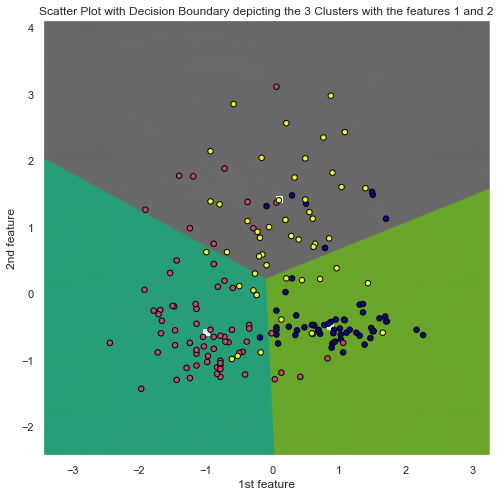

In [7]:
xx , yy = meshGrid(Xs[:,0], Xs[:,1], 0.01)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.pcolormesh(xx, yy, Z, cmap='Dark2', alpha=0.2, shading="gouraud", zorder=0) # cmap values referred from [1]
plt.scatter(Xs[:,0], Xs[:,1], c=y, cmap='plasma', alpha=1, s=30, edgecolor="black", zorder=2)
plt.scatter(centroids[:,0], centroids[:,1], marker="s",s = 30, color='w')
plt.xlabel('1st feature')
plt.ylabel('2nd feature')
plt.title('Scatter Plot with Decision Boundary depicting the 3 Clusters with the features 1 and 2')
plt.show()

### How good your model performs on this data?

## The model performance is not great. The model has done a good job on 2 labels but not on the other. The reason is also the distribution of that data. One of the clusters has low homogeneity and completeness. This has resulted in the overall low homogeneity and completeness scores.

#### Exercise 4.5 (20 pts)

In the previous model you used the first two features: 'Alcohol' and 'Malic acid'. 
For this exercise, pick features 'Alcohol' and 'OD280/OD315 of diluted wines' (feature #1 and feature #12) as your
two attributes and perform the tasks in Exercise 4.4. (cluster, report metrics, draw decision boundaries)

Which model performs better?

Homogeneity Score : 0.7165200350632882
Completeness Score : 0.7097867959696349


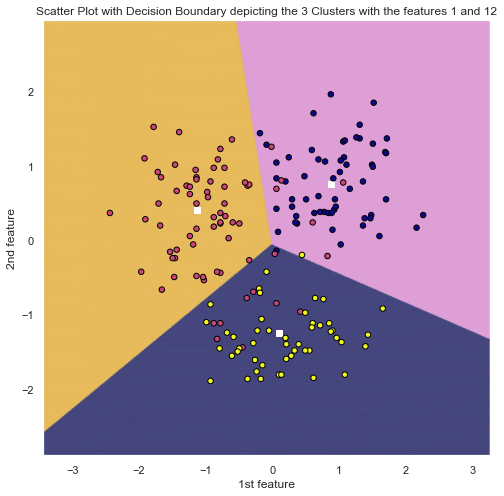

In [8]:
# Your code here
X2 = data.iloc[:,[0,11]]
# Scaling data
scaler2 = StandardScaler()
scaler2.fit(X2)
Xs2 = scaler2.transform(X2)
kmeans2 = KMeans(n_clusters=3, random_state=0)
kmeans2.fit(Xs2)
# Display cluster evaluation metrics
print('Homogeneity Score : ' + str(homogeneity_score(y,kmeans2.labels_)))
print('Completeness Score : ' + str(completeness_score(y,kmeans2.labels_)))

centroids2 = kmeans2.cluster_centers_

xx2 , yy2 = meshGrid(Xs2[:,0], Xs2[:,1], 0.01)
Z2 = kmeans2.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z2 = Z2.reshape(xx2.shape)

plt.figure(figsize=(8,8))
plt.grid(True)
plt.pcolormesh(xx2, yy2, Z2, cmap='tab20b', alpha=0.2, shading="gouraud", zorder=0)
plt.scatter(Xs2[:,0], Xs2[:,1], c=y, cmap='plasma', alpha=1, s=30, edgecolor="black", zorder=2)
plt.scatter(centroids2[:,0], centroids2[:,1], marker="s",s = 30, color='w')
plt.title('Scatter Plot with Decision Boundary depicting the 3 Clusters with the features 1 and 12')
plt.xlabel('1st feature')
plt.ylabel('2nd feature')
plt.show()

### Which model performs better?

## The second model with the 1st and 12th features performs better than the first model. It has better homogeneity and completeness scores.

# References :

[1] https://matplotlib.org/stable/tutorials/colors/colormaps.html